# **Capstone Project: Exploratory Data Analysis and Predictive Modeling for Candidate Joining Prediction**

## **Project Overview**

### **Title**: Exploratory Data Analysis and Predictive Modeling for Candidate Joining Prediction in Talent Acquisition

### **Objective**:
##  **To predict whether candidates will join after accepting job offers using data analysis and machine learning techniques.**


# ***Let's Begin !***

## ***Know Your Data***

# **Loading Dataset and Importing Modules**

## Import Libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import zscore

In [211]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [214]:
os.chdir(r'C:\Users\ramna\Desktop\Project2')

In [216]:
# Load the datasets
hr_df = pd.read_csv(r'data/HR_Hiring_details_transaction.csv')
interview_dates = pd.read_excel(r'data/Interview_Dates.xlsx')
joining_status = pd.read_csv(r'data/joining_Status.csv')
lob_master = pd.read_csv(r'data/LOB_Master.csv')
location_master = pd.read_excel(r'data/Location_Master.xlsx')
postal_code_master = pd.read_excel(r'data/Postal_Code_Master.xlsx')
region_location_mapping = pd.read_excel(r'data/Region_Location_Mapping.xlsx')
region_master = pd.read_excel(r'data/Region_Master.xlsx')
domicile_master = pd.read_excel(r'data/Domicile_Master.xlsx')

# **Merging CSV and Excel Files for Data Preparation**

In [218]:
# Merge HR data with joining status
hr_df = pd.merge(hr_df, joining_status, on='Candidate_Ref', how='left')

# Merge HR data with interview dates
hr_df = pd.merge(hr_df, interview_dates, on='Candidate_Ref', how='left')

# Merge HR data with LOB Master
hr_df = pd.merge(hr_df, lob_master, left_on='LOB_Id', right_on='LOB_Id', how='left')

# Merge HR data with Postal Code Master
hr_df = pd.merge(hr_df, postal_code_master, on='Postal_Code', how='left', suffixes=('', '_postal'))

# Merge HR data with Location Master
hr_df = pd.merge(hr_df, location_master, left_on='Location_ID', right_on='Location_ID', how='left', suffixes=('', '_location'))

# Merge HR data with Region Location Mapping and Region Master
hr_df = pd.merge(hr_df, region_location_mapping, on='Location_ID', how='left', suffixes=('', '_region_mapping'))
hr_df = pd.merge(hr_df, region_master, on='Region_ID', how='left', suffixes=('', '_region'))

# Merge HR data with Domicile Master
hr_df = pd.merge(hr_df, domicile_master, left_on='Domicile_Id', right_on='Domicile_ID', how='left', suffixes=('', '_domicile'))

# Removing Duplicate Columns

### After merging datasets, duplicate columns need to be removed for a clean dataset.

In [220]:
# Display the merged dataset

display(HTML(hr_df.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location_ID_postal,Location,Region_ID,Region_Name,Domicile_ID,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08,ERS,L001,Noida,R1,North,D6,Goa
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12,INFRA,L002,Chennai,R2,South,D9,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25,INFRA,L001,Noida,R1,North,D10,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27,INFRA,L001,Noida,R1,North,D3,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28,INFRA,L001,Noida,R1,North,D21,Tripura


In [224]:
# Transpose the DataFrame for comparison
df_transposed = hr_df.T

# Identify duplicated columns without printing them
duplicates = df_transposed.duplicated(keep=False)

# Find unique columns by removing duplicates
unique_columns = ~df_transposed.duplicated(keep='first')

# Keep only the unique columns
df_no_duplicates = df_transposed[unique_columns].T

# Optional: Print a summary of the columns removed
print(f"Number of columns removed: {duplicates.sum()}")
print(f"Shape of DataFrame after removing duplicates: {df_no_duplicates.shape}")

Number of columns removed: 2
Shape of DataFrame after removing duplicates: (8995, 27)


In [226]:
display(HTML(df_no_duplicates.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location_ID_postal,Location,Region_ID,Region_Name,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08 00:00:00,ERS,L001,Noida,R1,North,Goa
1,2,2112635,No,18,30,E2,50.0,320.0,180.0,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12 00:00:00,INFRA,L002,Chennai,R2,South,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25 00:00:00,INFRA,L001,Noida,R1,North,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27 00:00:00,INFRA,L001,Noida,R1,North,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.0,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28 00:00:00,INFRA,L001,Noida,R1,North,Tripura


In [228]:
# Drop the redundant Location_ID_postal column
df_no_duplicates.drop(columns=['Location_ID_postal'], inplace=True)

In [230]:
display(HTML(df_no_duplicates.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08 00:00:00,ERS,Noida,R1,North,Goa
1,2,2112635,No,18,30,E2,50.0,320.0,180.0,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12 00:00:00,INFRA,Chennai,R2,South,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25 00:00:00,INFRA,Noida,R1,North,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27 00:00:00,INFRA,Noida,R1,North,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.0,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28 00:00:00,INFRA,Noida,R1,North,Tripura


In [232]:
merged_hr_removed_duplicates_data = df_no_duplicates

## Save the Merged DataFrame to CSV

In [235]:
# Save the merged dataset to a new CSV file
merged_hr_removed_duplicates_data.to_csv('data/merged_hr_removed_duplicates_data.csv', index=False)

# **Understand More About The Data**

### Dataset First View

In [239]:
display(HTML(merged_hr_removed_duplicates_data.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08 00:00:00,ERS,Noida,R1,North,Goa
1,2,2112635,No,18,30,E2,50.0,320.0,180.0,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12 00:00:00,INFRA,Chennai,R2,South,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25 00:00:00,INFRA,Noida,R1,North,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27 00:00:00,INFRA,Noida,R1,North,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.0,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28 00:00:00,INFRA,Noida,R1,North,Tripura


### Dataset Rows & Columns count

In [242]:
# Dataset Rows & Columns count
print(merged_hr_removed_duplicates_data.shape)

(8995, 26)


In [244]:
#Getting all the columns
print("Features of the dataset:")
merged_hr_removed_duplicates_data.columns

Features of the dataset:


Index(['Sno', 'Candidate_Ref', 'DOJ_Extended', 'Duration_to_accept_offer',
       'Notice_Period', 'Offered_Band', 'Percent_hike_expected_in_CTC',
       'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
       'Joining_Bonus', 'Candidate_relocate_actual', 'Gender',
       'Candidate_Source', 'Rex_in_Yrs', 'Location_ID', 'Postal_Code', 'Age',
       'LOB_Id', 'Domicile_Id', 'Status', 'Date_of_Interview', 'LOB',
       'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'],
      dtype='object')

## Dataset Information

In [247]:
#check details about the data set
merged_hr_removed_duplicates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sno                           8995 non-null   object
 1   Candidate_Ref                 8995 non-null   object
 2   DOJ_Extended                  8995 non-null   object
 3   Duration_to_accept_offer      8995 non-null   object
 4   Notice_Period                 8995 non-null   object
 5   Offered_Band                  8982 non-null   object
 6   Percent_hike_expected_in_CTC  8995 non-null   object
 7   Percent_hike_offered_in_CTC   8995 non-null   object
 8   Percent_difference_CTC        8995 non-null   object
 9   Joining_Bonus                 8995 non-null   object
 10  Candidate_relocate_actual     8995 non-null   object
 11  Gender                        8995 non-null   object
 12  Candidate_Source              8995 non-null   object
 13  Rex_in_Yrs        

## Duplicate Values

In [250]:
# Checking for duplicate rows in the DataFrame
duplicate_count = merged_hr_removed_duplicates_data.duplicated().sum()
total_rows = len(merged_hr_removed_duplicates_data)

print(f"Total number of rows: {total_rows}")
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Is the data duplicated? {'Yes' if duplicate_count > 0 else 'No'}")
print(f"Number of unique rows: {total_rows - duplicate_count}")

Total number of rows: 8995
Number of duplicate rows: 0
Is the data duplicated? No
Number of unique rows: 8995


### Check Unique Values for each variable.

In [253]:
# Check Unique Values for each variable.

for i in merged_hr_removed_duplicates_data.columns.tolist():
  print(f"No. of unique values in {i} is {merged_hr_removed_duplicates_data[i].nunique()}.")

No. of unique values in Sno is 8995.
No. of unique values in Candidate_Ref is 8995.
No. of unique values in DOJ_Extended is 2.
No. of unique values in Duration_to_accept_offer is 136.
No. of unique values in Notice_Period is 7.
No. of unique values in Offered_Band is 4.
No. of unique values in Percent_hike_expected_in_CTC is 2082.
No. of unique values in Percent_hike_offered_in_CTC is 2601.
No. of unique values in Percent_difference_CTC is 1148.
No. of unique values in Joining_Bonus is 2.
No. of unique values in Candidate_relocate_actual is 2.
No. of unique values in Gender is 2.
No. of unique values in Candidate_Source is 3.
No. of unique values in Rex_in_Yrs is 22.
No. of unique values in Location_ID is 11.
No. of unique values in Postal_Code is 15.
No. of unique values in Age is 33.
No. of unique values in LOB_Id is 9.
No. of unique values in Domicile_Id is 24.
No. of unique values in Status is 2.
No. of unique values in Date_of_Interview is 499.
No. of unique values in LOB is 9.
No

## Missing Values / Null values

In [256]:
print(merged_hr_removed_duplicates_data.isnull().sum())

Sno                              0
Candidate_Ref                    0
DOJ_Extended                     0
Duration_to_accept_offer         0
Notice_Period                    0
Offered_Band                    13
Percent_hike_expected_in_CTC     0
Percent_hike_offered_in_CTC      0
Percent_difference_CTC           0
Joining_Bonus                    0
Candidate_relocate_actual        0
Gender                           0
Candidate_Source                 0
Rex_in_Yrs                       0
Location_ID                      0
Postal_Code                      0
Age                             15
LOB_Id                           0
Domicile_Id                      0
Status                           0
Date_of_Interview                0
LOB                              0
Location                        13
Region_ID                       13
Region_Name                     13
Domicile_Name                    0
dtype: int64


In [258]:
print(merged_hr_removed_duplicates_data.duplicated().sum())

0


## Visualizing the missing values

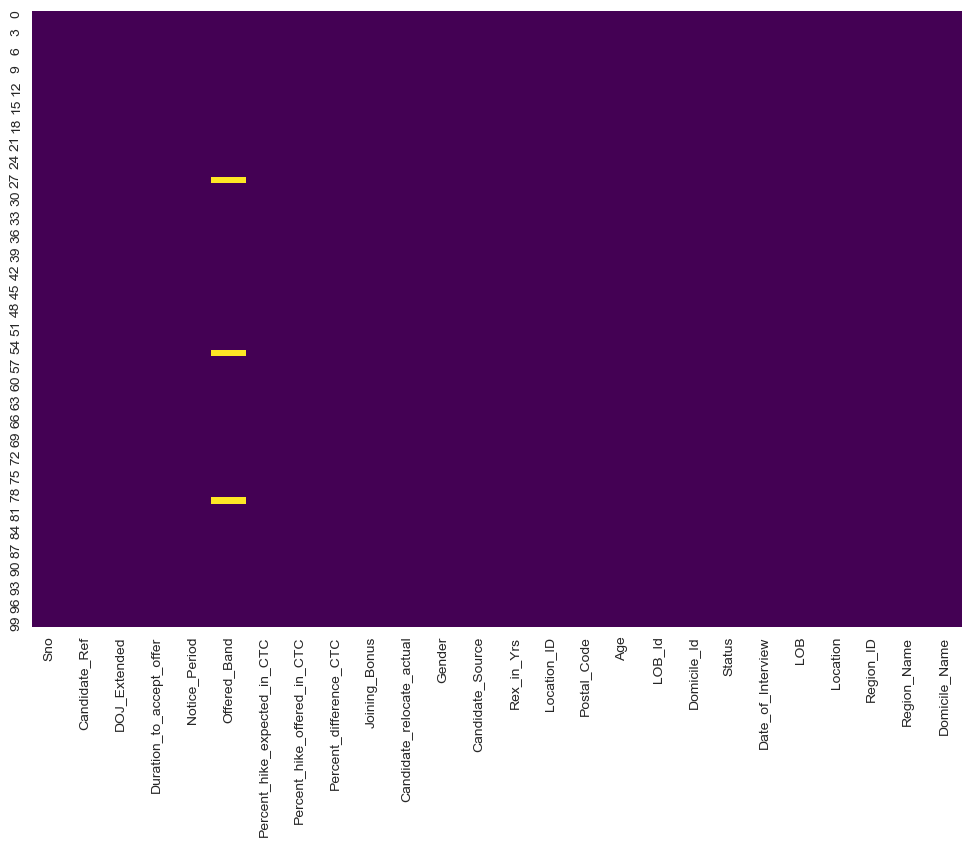

In [261]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_hr_removed_duplicates_data.iloc[:100, :].isnull(), cbar=False, cmap='viridis')
plt.show()

# Data Quality Check Summary

* **Total Observations:** 8,995
* **Total Features:** 26

## Missing Values
* **Columns with Missing Values:**
  - `Offered_Band`: 13 missing (0.14%)
  - `Age`: 15 missing (0.17%)
  - `Location`: 13 missing (0.14%)
  - `Region_ID`: 13 missing (0.14%)
  - `Region_Name`: 13 missing (0.14%)

## Null Values
* **Columns with Null Values:**
  - `Location_ID_postal`: 1 null (0.01%)
  - `Domicile_ID`: 1 null (0.01%)

## Duplicate Values
* **Total Duplicate Rows:** 0 (No duplicates found)

## Data Type Issues
* **Date Columns:**
  - `Date_of_Interview`, `DOJ_Extended`: Convert to `datetime` data type for proper analysis.
* **Numeric Columns Stored as Objects:**
  - `Duration_to_accept_offer`, `Notice_Period`, `Percent_hike_expected_in_CTC`, `Percent_hike_offered_in_CTC`, `Percent_difference_CTC`, `Rex_in_Yrs`, `Age`: Convert to appropriate numeric data types (`int` or `float`).
* **Categorical Columns Stored as Objects:**
  - `Joining_Bonus`, `Candidate_relocate_actual`, `Gender`, `Candidate_Source`, `Offered_Band`, `Location_ID`, `LOB_Id`, `Domicile_Id`, `Status`, `LOB`, `Location`, `Region_ID`, `Region_Name`, `Domicile_Name`: Convert to `category` data type for optimized memory usage and analysis.
memory usage and analysis.


In [264]:
# Display rows with any missing values
rows_with_missing = merged_hr_removed_duplicates_data[merged_hr_removed_duplicates_data.isnull().any(axis=1)]

# Display the number of rows with missing values
num_rows_with_missing = rows_with_missing.shape[0]
print(f"Number of rows with missing values: {num_rows_with_missing}")

display(HTML(rows_with_missing.to_html()))

Number of rows with missing values: 40


,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location,Region_ID,Region_Name,Domicile_Name
27,30,2207823,Yes,19,30,NaN,42.85,42.85,0.0,No,No,Male,Direct,7,L001,201301,28.0,2,D13,Joined,2013-07-17 00:00:00,INFRA,Noida,R1,North,Madhya Pradesh
55,68,2286381,Yes,14,30,NaN,-12.5,-12.5,0.0,No,No,Male,Direct,3,L006,700027,31.0,7,D4,Joined,2013-12-31 00:00:00,AXON,Kolkata,R3,East,Chhattisgarh
79,102,2365129,No,4,30,NaN,42.86,42.86,0.0,No,No,Male,Direct,2,L007,682001,24.0,2,D12,Not Joined,2013-01-02 00:00:00,INFRA,Cochin,R2,South,Kerala
109,139,2452418,Yes,32,30,NaN,45.3,19.66,-17.65,No,Yes,Male,Agency,7,L004,560034,30.0,6,D15,Joined,2013-02-20 00:00:00,ETS,Bangalore,R2,South,Manipur
138,177,2569520,No,5,30,NaN,-48.25,-48.25,0.0,No,No,Male,Employee Referral,9,L002,600020,31.0,2,D20,Joined,2013-03-30 00:00:00,INFRA,Chennai,R2,South,Telangana
167,213,2780669,Yes,29,60,NaN,33.33,266.67,175.0,No,No,Male,Agency,9,L001,201301,32.0,1,D23,Not Joined,2013-05-11 00:00:00,ERS,Noida,R1,North,Uttarkhand
194,245,2845929,Yes,55,30,NaN,37.5,25.0,-9.09,No,Yes,Female,Employee Referral,3,L004,560034,25.0,2,D15,Joined,2013-06-15 00:00:00,INFRA,Bangalore,R2,South,Manipur
220,283,3110300,Yes,15,30,E1,42.83,42.83,0.0,No,No,Male,Employee Referral,2,Null,600018,26.0,2,D16,Joined,2013-08-06 00:00:00,INFRA,NaN,NaN,NaN,Odisha
227,291,3211382,No,4,30,NaN,42.85,42.85,0.0,No,No,Male,Agency,4,L004,560034,30.0,2,D22,Joined,2013-08-20 00:00:00,INFRA,Bangalore,R2,South,Uttar Pradesh
281,360,3300563,Yes,29,30,NaN,-30.0,-30.6,-0.85,No,No,Male,Employee Referral,8,L001,201301,33.0,5,D19,Joined,2013-11-05 00:00:00,CSMP,Noida,R1,North,Tamil Nadu


# Missing Values Handling 

* **Total Observations:** 8,995
* **Total Features:** 26

## Missing Values Summary
* **Total Rows with Missing Values:** 40 (0.45% of total rows)

## Planned Action
* **Rows with Missing Values:** 40 rows will be dropped from the dataset.
* **Reasoning:** The percentage of rows with missing values is minimal, which will allow for their removal without significantly impacting the dataset’s quality.

## Final Dataset (Post-Cleanup)

* **Rows After Cleaning:** 8,955
* **Features:** 26


In [267]:
# Drop rows with any missing values
hr_data_clean = merged_hr_removed_duplicates_data.dropna()

# Display the updated DataFrame to verify changes
print(hr_data_clean.isnull().sum())  # This will confirm if all missing values have been removed

# Display the number of rows remaining after dropping
print(f"Number of rows after removing missing values: {hr_data_clean.shape[0]}")

Sno                             0
Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Postal_Code                     0
Age                             0
LOB_Id                          0
Domicile_Id                     0
Status                          0
Date_of_Interview               0
LOB                             0
Location                        0
Region_ID                       0
Region_Name                     0
Domicile_Name                   0
dtype: int64
Number of rows after removing missing values: 8955


## ***Understanding Your Variables***

In [270]:
# Dataset Columns
print(f'Features: {hr_data_clean.columns.to_list()}')

Features: ['Sno', 'Candidate_Ref', 'DOJ_Extended', 'Duration_to_accept_offer', 'Notice_Period', 'Offered_Band', 'Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Rex_in_Yrs', 'Location_ID', 'Postal_Code', 'Age', 'LOB_Id', 'Domicile_Id', 'Status', 'Date_of_Interview', 'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name']


In [272]:
# Get a description of the dataset, including all types of features
data_description = hr_data_clean.describe(include='all').T

print("Data Description:")
print(data_description)


Data Description:
                               count  unique                  top    freq
Sno                             8955    8955                    1       1
Candidate_Ref                   8955    8955              2110407       1
DOJ_Extended                    8955       2                   No    4771
Duration_to_accept_offer        8955     136                    1     840
Notice_Period                   8955       7                   30    5133
Offered_Band                    8955       4                   E1    5546
Percent_hike_expected_in_CTC  8955.0  2072.0                42.86   573.0
Percent_hike_offered_in_CTC   8955.0  2591.0                42.86   602.0
Percent_difference_CTC        8955.0  1145.0                  0.0  3455.0
Joining_Bonus                   8955       2                   No    8539
Candidate_relocate_actual       8955       2                   No    7671
Gender                          8955       2                 Male    7407
Candidate_Source    

## Features description

### ***Breakdown of Our Features***

- **Sno:** 
  - *Description:* Serial number, auto-incremented.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Candidate_Ref:** 
  - *Description:* Unique reference number for each candidate.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **DOJ_Extended:** 
  - *Description:* Date of joining (extended).
  - *Type:* `object`.
  - *Action Required:* Convert to `datetime` format.

- **Duration_to_accept_offer:** 
  - *Description:* Number of days taken by the candidate to accept the offer.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Notice_Period:** 
  - *Description:* Notice period with the previous employer, in days.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Offered_Band:** 
  - *Description:* Job band offered, e.g., E1, E2, E3.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Percent_hike_expected_in_CTC:** 
  - *Description:* Expected percentage hike in CTC by the candidate.
  - *Type:* `object`.
  - *Action Required:* Convert to `float`.

- **Percent_hike_offered_in_CTC:** 
  - *Description:* Percentage hike in CTC offered by the organization.
  - *Type:* `object`.
  - *Action Required:* Convert to `float`.

- **Percent_difference_CTC:** 
  - *Description:* Difference between expected and offered CTC in percentage.
  - *Type:* `object`.
  - *Action Required:* Convert to `float`.

- **Joining_Bonus:** 
  - *Description:* Bonus offered upon joining.
  - *Type:* `object`.
  - *Action Required:* Convert to `float`.

- **Candidate_relocate_actual:** 
  - *Description:* Indicates whether relocation is required or not.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Gender:** 
  - *Description:* Gender of the candidate.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Candidate_Source:** 
  - *Description:* Source through which the candidate applied or was reached.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Rex_in_Yrs:** 
  - *Description:* Years of experience.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Location_ID:** 
  - *Description:* Code for the current location of the organization.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Postal_Code:** 
  - *Description:* Postal code of the organization's area.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Age:** 
  - *Description:* Age of the candidate.
  - *Type:* `object`.
  - *Action Required:* Convert to `float`.

- **LOB_Id:** 
  - *Description:* Unique ID for the Line of Business (LOB).
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Domicile_Id:** 
  - *Description:* Code for the home state of the candidate.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Status:** 
  - *Description:* Status indicating if the candidate joined or not.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Date_of_Interview:** 
  - *Description:* Date on which the interview was conducted.
  - *Type:* `object`.
  - *Action Required:* Convert to `datetime` format.

- **LOB:** 
  - *Description:* Line of business.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Location:** 
  - *Description:* Name of the location.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Region_ID:** 
  - *Description:* Code representing the region.
  - *Type:* `object`.
  - *Action Required:* Convert to `int`.

- **Region_Name:** 
  - *Description:* Name of the region.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.

- **Domicile_Name:** 
  - *Description:* Name of the domicile or home state.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.
Name:** 
  - *Description:* Name of the domicile or home state.
  - *Type:* `object`.
  - *Action Required:* Convert to `category`.


# **Preprocessing the dataset**

#### ***Missing Values/Null Values***

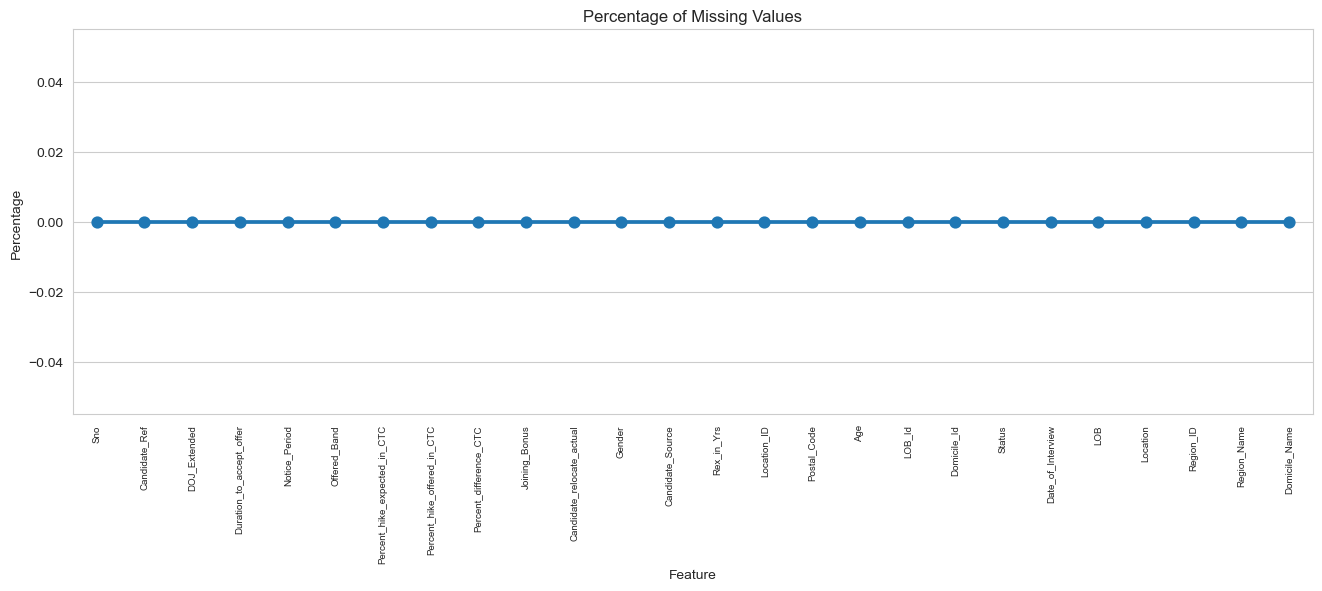

In [278]:
# Visualizing the missing values
# Calculate the percentage of missing values
missing = pd.DataFrame((hr_data_clean.isnull().sum() * 100) / hr_data_clean.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

* ***As we can see above there are no missing value present***

In [281]:
# Checking Duplicate Values
value=len(hr_data_clean[hr_data_clean.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [283]:
hr_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sno                           8955 non-null   object
 1   Candidate_Ref                 8955 non-null   object
 2   DOJ_Extended                  8955 non-null   object
 3   Duration_to_accept_offer      8955 non-null   object
 4   Notice_Period                 8955 non-null   object
 5   Offered_Band                  8955 non-null   object
 6   Percent_hike_expected_in_CTC  8955 non-null   object
 7   Percent_hike_offered_in_CTC   8955 non-null   object
 8   Percent_difference_CTC        8955 non-null   object
 9   Joining_Bonus                 8955 non-null   object
 10  Candidate_relocate_actual     8955 non-null   object
 11  Gender                        8955 non-null   object
 12  Candidate_Source              8955 non-null   object
 13  Rex_in_Yrs             

## ***Data Type Conversion Steps:***

1. **Convert Date Columns:**
   - **`Date_of_Interview`**: Convert from `object` to `datetime` format.

2. **Convert to Categorical Data Type:**
   - **`DOJ_Extended`**: Convert from `object` to `category`.
   - **`Offered_Band`**: Convert from `object` to `category`.
   - **`Joining_Bonus`**: Convert from `object` to `category`.
   - **`Candidate_relocate_actual`**: Convert from `object` to `category`.
   - **`Gender`**: Convert from `object` to `category`.
   - **`Candidate_Source`**: Convert from `object` to `category`.
   - **`Location_ID`**: Convert from `object` to `category`.
   - **`Domicile_Id`**: Convert from `object` to `category`.
   - **`Status`**: Convert from `object` to `category`.
   - **`LOB`**: Convert from `object` to `category`.
   - **`Location`**: Convert from `object` to `category`.
   - **`Region_ID`**: Convert from `object` to `category`.
   - **`Region_Name`**: Convert from `object` to `category`.
   - **`Domicile_Name`**: Convert from `object` to `category`.

3. **Convert to Numeric Data Type:**
   - **`Sno`**: Convert from `object` to `int`.
   - **`Candidate_Ref`**: Convert from `object` to `int`.
   - **`Duration_to_accept_offer`**: Convert from `object` to `int`.
   - **`Notice_Period`**: Convert from `object` to `int`.
   - **`Percent_hike_expected_in_CTC`**: Convert from `object` to `float`.
   - **`Percent_hike_offered_in_CTC`**: Convert from `object` to `float`.
   - **`Percent_difference_CTC`**: Convert from `object` to `float`.
   - **`Rex_in_Yrs`**: Convert from `object` to `int`.
   - **`Postal_Code`**: Convert from `object` to `int`.
   - **`Age`**: Convert from `object` to `float`.
   - **`LOB_Id`**: Convert from `object` to `int`.
vert from `object` to `int`.


In [286]:
display(HTML(hr_data_clean.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08 00:00:00,ERS,Noida,R1,North,Goa
1,2,2112635,No,18,30,E2,50.0,320.0,180.0,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12 00:00:00,INFRA,Chennai,R2,South,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25 00:00:00,INFRA,Noida,R1,North,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27 00:00:00,INFRA,Noida,R1,North,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.0,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28 00:00:00,INFRA,Noida,R1,North,Tripura


In [292]:
import pandas as pd

# Convert 'Date_of_Interview' to datetime
hr_data_clean['Date_of_Interview'] = pd.to_datetime(hr_data_clean['Date_of_Interview'], errors='coerce')

# Convert specified columns to categorical data types
categorical_columns = [
    'DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual',
    'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id', 'Status',
    'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'
]

for column in categorical_columns:
    hr_data_clean[column] = hr_data_clean[column].astype('category')

# Convert specified columns to numeric data types
numeric_columns = {
    'Sno': 'int',
    'Candidate_Ref': 'int',
    'Duration_to_accept_offer': 'int',
    'Notice_Period': 'int',
    'Percent_hike_expected_in_CTC': 'float',
    'Percent_hike_offered_in_CTC': 'float',
    'Percent_difference_CTC': 'float',
    'Rex_in_Yrs': 'int',
    'Postal_Code': 'int',
    'Age': 'float',
    'LOB_Id': 'int'
}

for column, dtype in numeric_columns.items():
    hr_data_clean[column] = pd.to_numeric(hr_data_clean[column], errors='coerce').astype(dtype)


C:\Users\ramna\AppData\Local\Temp\ipykernel_19168\2372348149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_clean['Date_of_Interview'] = pd.to_datetime(hr_data_clean['Date_of_Interview'], errors='coerce')
C:\Users\ramna\AppData\Local\Temp\ipykernel_19168\2372348149.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_clean[column] = hr_data_clean[column].astype('category')
C:\Users\ramna\AppData\Local\Temp\ipykernel_19168\2372348149.py:14: SettingWithCopyWarning: 
A value is trying to b

In [294]:
# Final inspection to ensure all types are correct
print(hr_data_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 8994
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sno                           8955 non-null   int32         
 1   Candidate_Ref                 8955 non-null   int32         
 2   DOJ_Extended                  8955 non-null   category      
 3   Duration_to_accept_offer      8955 non-null   int32         
 4   Notice_Period                 8955 non-null   int32         
 5   Offered_Band                  8955 non-null   category      
 6   Percent_hike_expected_in_CTC  8955 non-null   float64       
 7   Percent_hike_offered_in_CTC   8955 non-null   float64       
 8   Percent_difference_CTC        8955 non-null   float64       
 9   Joining_Bonus                 8955 non-null   category      
 10  Candidate_relocate_actual     8955 non-null   category      
 11  Gender                        8955 

In [296]:
# Display the cleaned dataset

display(HTML(hr_data_clean.head().to_html()))

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id,Status,Date_of_Interview,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6,Joined,2013-01-08,ERS,Noida,R1,North,Goa
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9,Joined,2013-01-12,INFRA,Chennai,R2,South,Himachal Pradesh
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,201301,27.0,2,D10,Joined,2013-01-25,INFRA,Noida,R1,North,Jharkhand
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3,Joined,2013-01-27,INFRA,Noida,R1,North,Chandigarh
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21,Joined,2013-01-28,INFRA,Noida,R1,North,Tripura


# **Exploratory Data Analysis Of The Data Set**

### Univariate Analysis

In [300]:
categorical_features = [
    'DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual',
    'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id', 'Status',
    'LOB', 'Location', 'Region_ID', 'Region_Name', 'Domicile_Name'
]

# Compute descriptive statistics
categorical_stats = hr_data_clean[categorical_features].describe()
display(HTML(categorical_stats.head().to_html()))


,DOJ_Extended,Offered_Band,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Location_ID,Domicile_Id,Status,LOB,Location,Region_ID,Region_Name,Domicile_Name
count,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955
unique,2,4,2,2,2,3,10,24,2,9,10,4,4,24
top,No,E1,No,No,Male,Direct,L002,D8,Joined,INFRA,Chennai,R2,South,Haryana
freq,4771,5546,8539,7671,7407,4784,3146,399,7277,2820,3146,5718,5718,399


### **Categorical Features Insights**

1. **DOJ_Extended:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** No.
   - **Frequency of Top Value:** 4,771.
   - **Insight:** A significant number of candidates did not extend their Date of Joining (DOJ). This could suggest a standard joining timeline for most candidates or that extensions are uncommon.

2. **Offered_Band:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 4 (E1, E2, E3, E4).
   - **Most Frequent (Top):** E1.
   - **Frequency of Top Value:** 5,546.
   - **Insight:** The majority of candidates were offered positions in the E1 band. This indicates that this band is the most common in the dataset, possibly reflecting the entry-level or most frequently hired roles.

3. **Joining_Bonus:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** Yes.
   - **Frequency of Top Value:** 8,539.
   - **Insight:** Most candidates received a joining bonus, suggesting that offering bonuses is a common practice for attracting new hires.

4. **Candidate_relocate_actual:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Yes, No).
   - **Most Frequent (Top):** No.
   - **Frequency of Top Value:** 7,671.
   - **Insight:** A large majority of candidates did not require relocation, which could imply that the company prefers or finds it easier to hire locally.

5. **Gender:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Male, Female).
   - **Most Frequent (Top):** Male.
   - **Frequency of Top Value:** 7,407.
   - **Insight:** There is a noticeable gender imbalance with males being more predominant. This suggests a potential area for exploring gender diversity and inclusion in hiring practices.

6. **Candidate_Source:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 3 (Direct, Referral, Agency).
   - **Most Frequent (Top):** Direct.
   - **Frequency of Top Value:** 4,784.
   - **Insight:** The majority of candidates were sourced directly, indicating a strong preference for or reliance on direct recruitment channels.

7. **Location_ID:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 10.
   - **Most Frequent (Top):** L002.
   - **Frequency of Top Value:** 3,146.
   - **Insight:** Location ID L002 is the most common, which may represent a major office or hiring location.

8. **Domicile_Id:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 24.
   - **Most Frequent (Top):** D8.
   - **Frequency of Top Value:** 399.
   - **Insight:** Domicile ID D8 is the most common, but the frequency is relatively low compared to the total, suggesting diverse representation from various domiciles.

9. **Status:**
   - **Count:** 8,955 entries.
   - **Unique Values:** 2 (Joined, Not Joined).
   - **Most Frequent (Top):** Joined.
   - **Frequency of Top Value:** 7,277.
   - **Insight:** A high percentage of candidates (approximately 81.3%) joined after accepting the offer, indicating effective recruitment processes and high acceptance rates.

10. **LOB (Line of Business):**
    - **Count:** 8,955 entries.
    - **Unique Values:** 9 (e.g., INFRA, IT, Sales).
    - **Most Frequent (Top):** INFRA.
    - **Frequency of Top Value:** 2,820.
    - **Insight:** The 'INFRA' line of business is the most represented, suggesting it might be a primary focus area or have a higher hiring volume.

11. **Location:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 10.
    - **Most Frequent (Top):** Chennai.
    - **Frequency of Top Value:** 3,146.
    - **Insight:** Chennai is the most common location for candidates, reflecting either a major hiring hub or strong company presence in this region.

12. **Region_ID:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 4.
    - **Most Frequent (Top):** R2.
    - **Frequency of Top Value:** 5,718.
    - **Insight:** Region ID R2 has the highest frequency, indicating it is a significant region for hiring.

13. **Region_Name:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 4 (e.g., North, South).
    - **Most Frequent (Top):** South.
    - **Frequency of Top Value:** 5,718.
    - **Insight:** The 'South' region is the most represented, aligning with the frequent location of Chennai, and suggesting a regional concentration in hiring.

14. **Domicile_Name:**
    - **Count:** 8,955 entries.
    - **Unique Values:** 24.
    - **Most Frequent (Top):** Haryana.
    - **Frequency of Top Value:** 399.
    - **Insight:** Haryana is the most common domicile, though the frequency is relatively small compared to the overall dataset, indicating a diverse range of domicile states.

### **Next Steps**
- Investigate reasons for gender imbalance and explore ways to enhance diversity.
- Examine why certain job bands (e.g., E1) are more prevalent and assess if this aligns with the company’s hiring strategy.
- Review the effectiveness of recruitment channels and consider expanding or optimizing them.
- Analyze regional hiring strategies to ensure alignment with business objectives and regional presence.


### 1. Correlation Analysis for Numerical Features

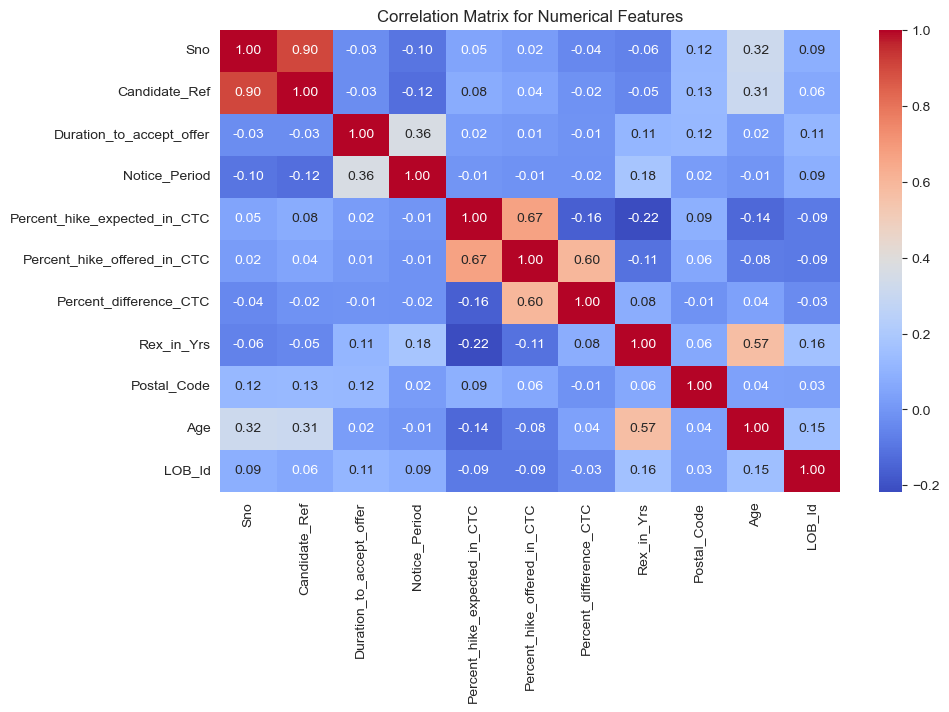

In [305]:

# Select only numerical columns for correlation analysis
numerical_data = hr_data_clean.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [307]:
print(hr_data_clean.dtypes)

Sno                                      int32
Candidate_Ref                            int32
DOJ_Extended                          category
Duration_to_accept_offer                 int32
Notice_Period                            int32
Offered_Band                          category
Percent_hike_expected_in_CTC           float64
Percent_hike_offered_in_CTC            float64
Percent_difference_CTC                 float64
Joining_Bonus                         category
Candidate_relocate_actual             category
Gender                                category
Candidate_Source                      category
Rex_in_Yrs                               int32
Location_ID                           category
Postal_Code                              int32
Age                                    float64
LOB_Id                                   int32
Domicile_Id                           category
Status                                category
Date_of_Interview               datetime64[ns]
LOB          

### 2. Comparison of Numerical Features by Status

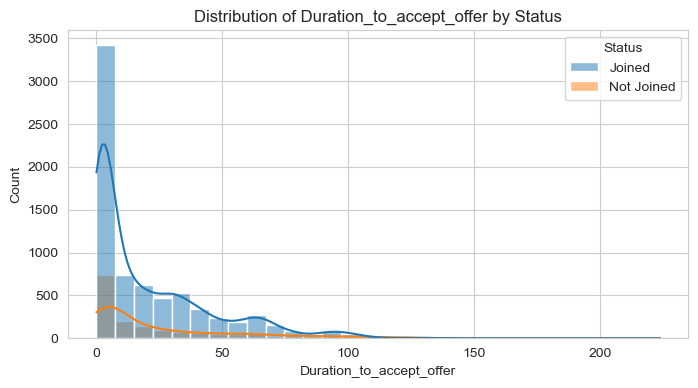

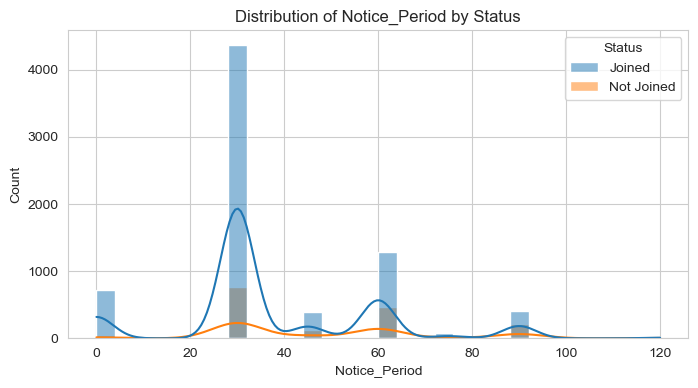

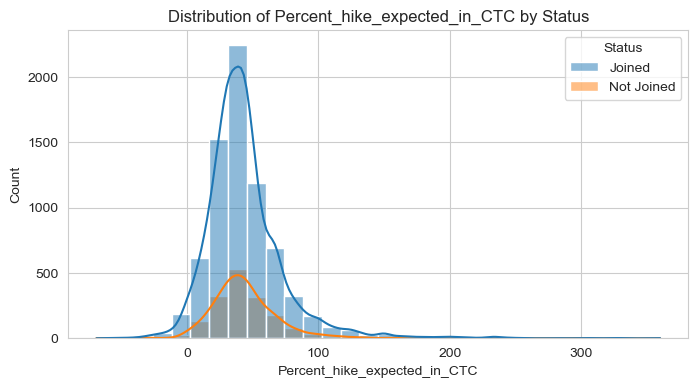

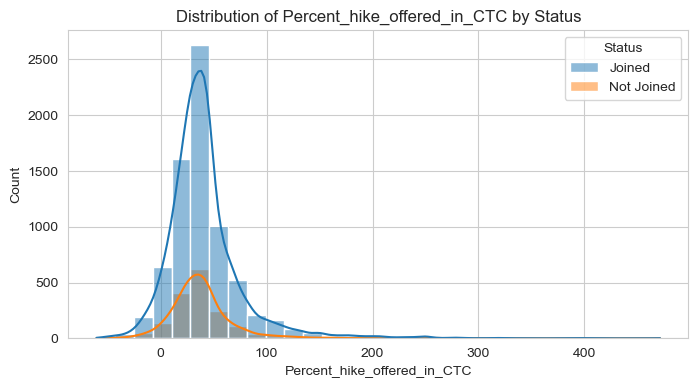

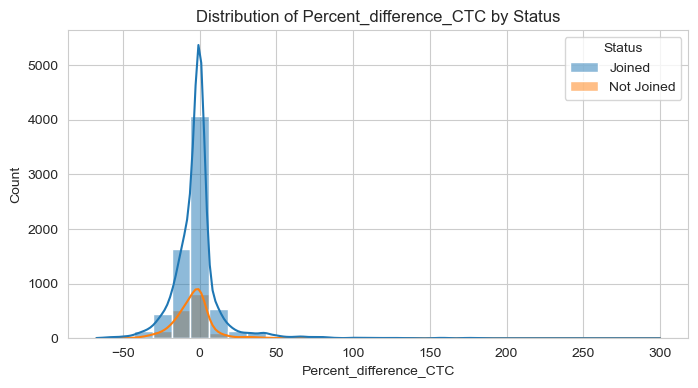

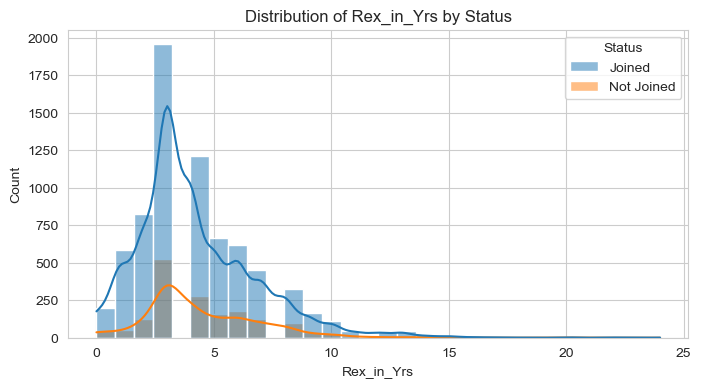

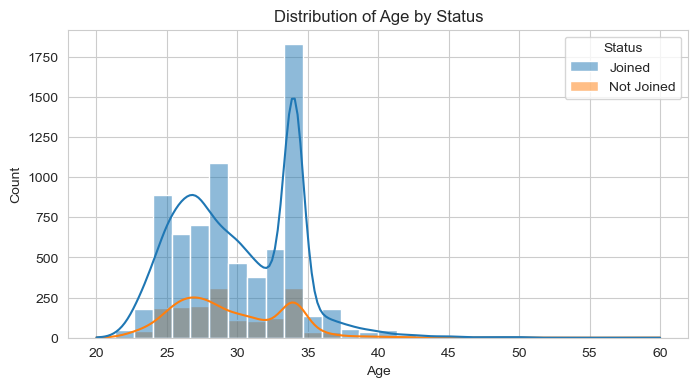

In [310]:

# Plotting histograms for numerical features
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC', 
                      'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
                      'Rex_in_Yrs', 'Age']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=hr_data_clean, x=feature, hue='Status', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Status')
    plt.show()

### 3. Categorical Feature Relationships

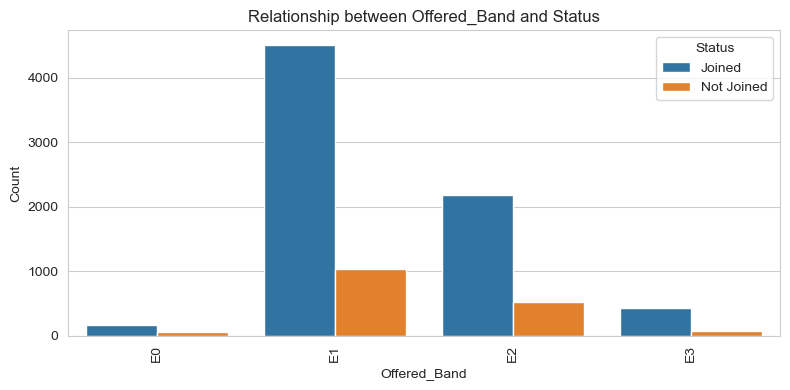

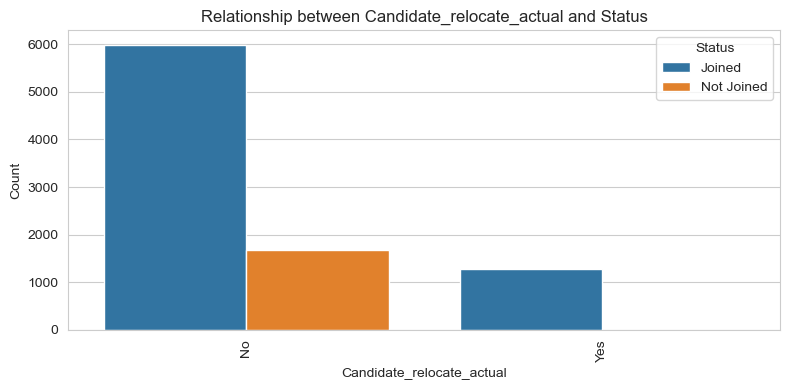

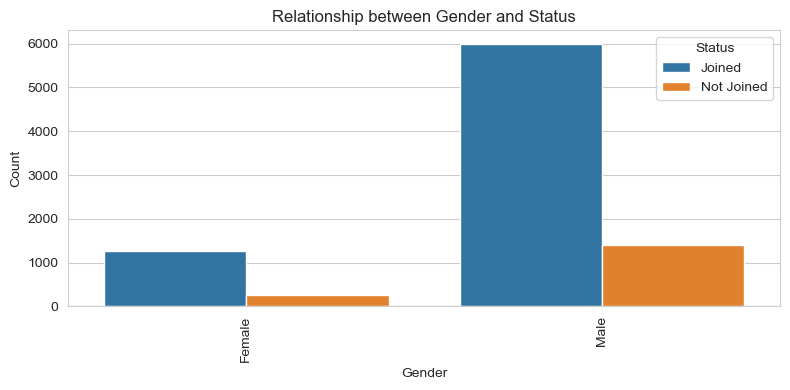

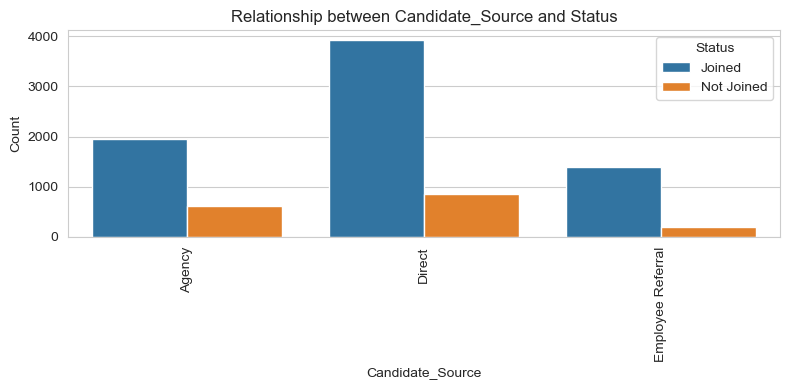

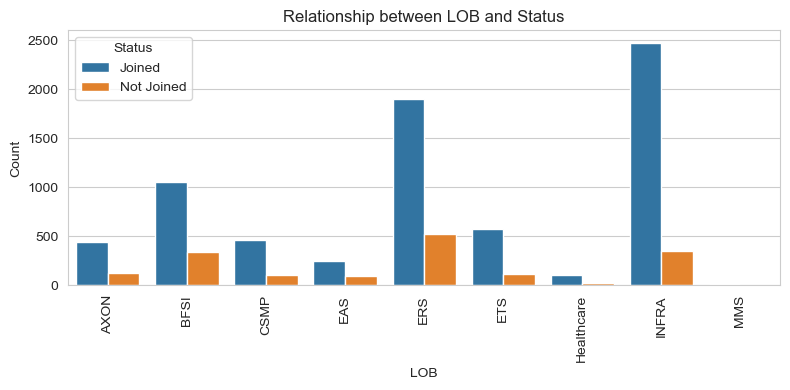

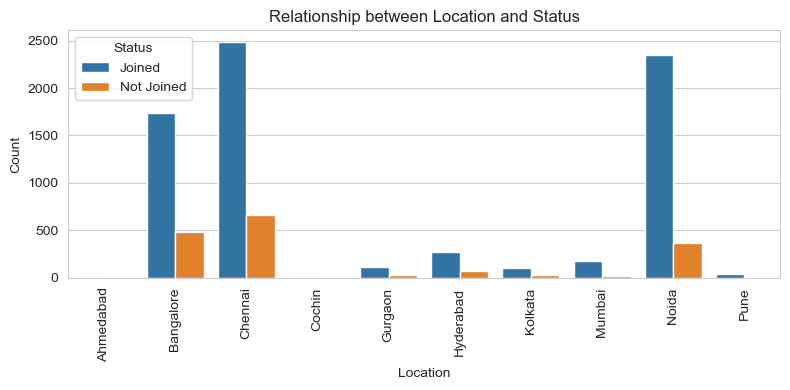

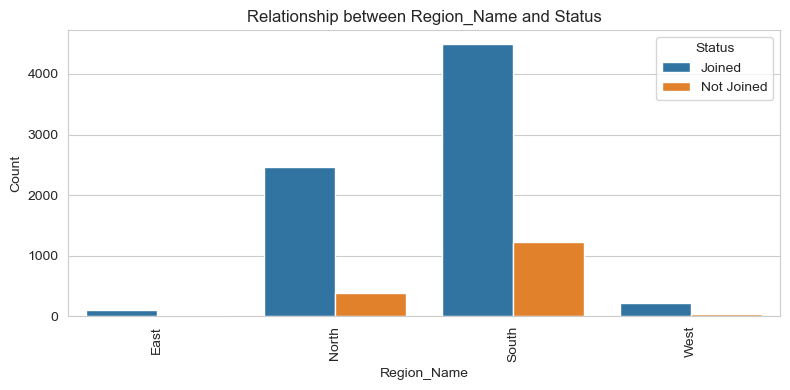

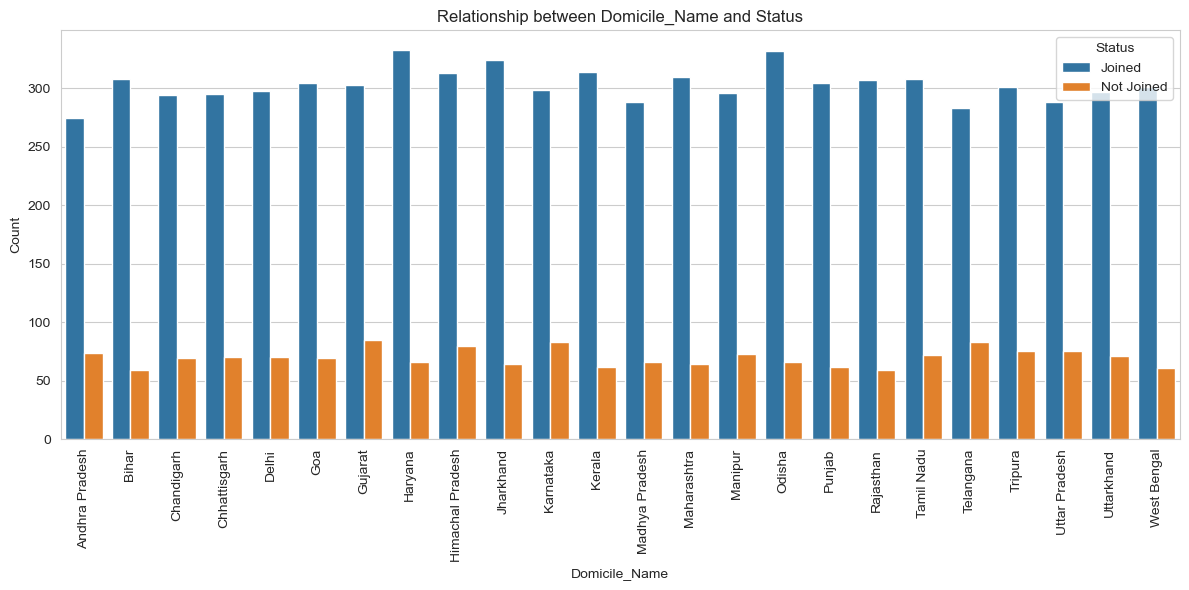

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for a more professional appearance
sns.set_style('whitegrid')

# Count plots for categorical features
categorical_features = ['Offered_Band', 'Candidate_relocate_actual', 'Gender', 
                        'Candidate_Source', 'LOB', 'Location', 'Region_Name', 'Domicile_Name']

for feature in categorical_features:
    # Adjust figure size dynamically for Domicile_Name
    if feature == 'Domicile_Name':  # Larger plot for Domicile_Name
        plt.figure(figsize=(12, 6))
    else:
        plt.figure(figsize=(8, 4))
    
    sns.countplot(data=hr_data_clean, x=feature, hue='Status')
    plt.title(f'Relationship between {feature} and Status')
    
    # Rotate x-tick labels vertically for better readability
    plt.xticks(rotation=90)  # Rotate labels vertically
    
    plt.xlabel(feature)  # Add x-axis label
    plt.ylabel('Count')  # Add y-axis label
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### 4. Pair Plot for Key Numerical Features


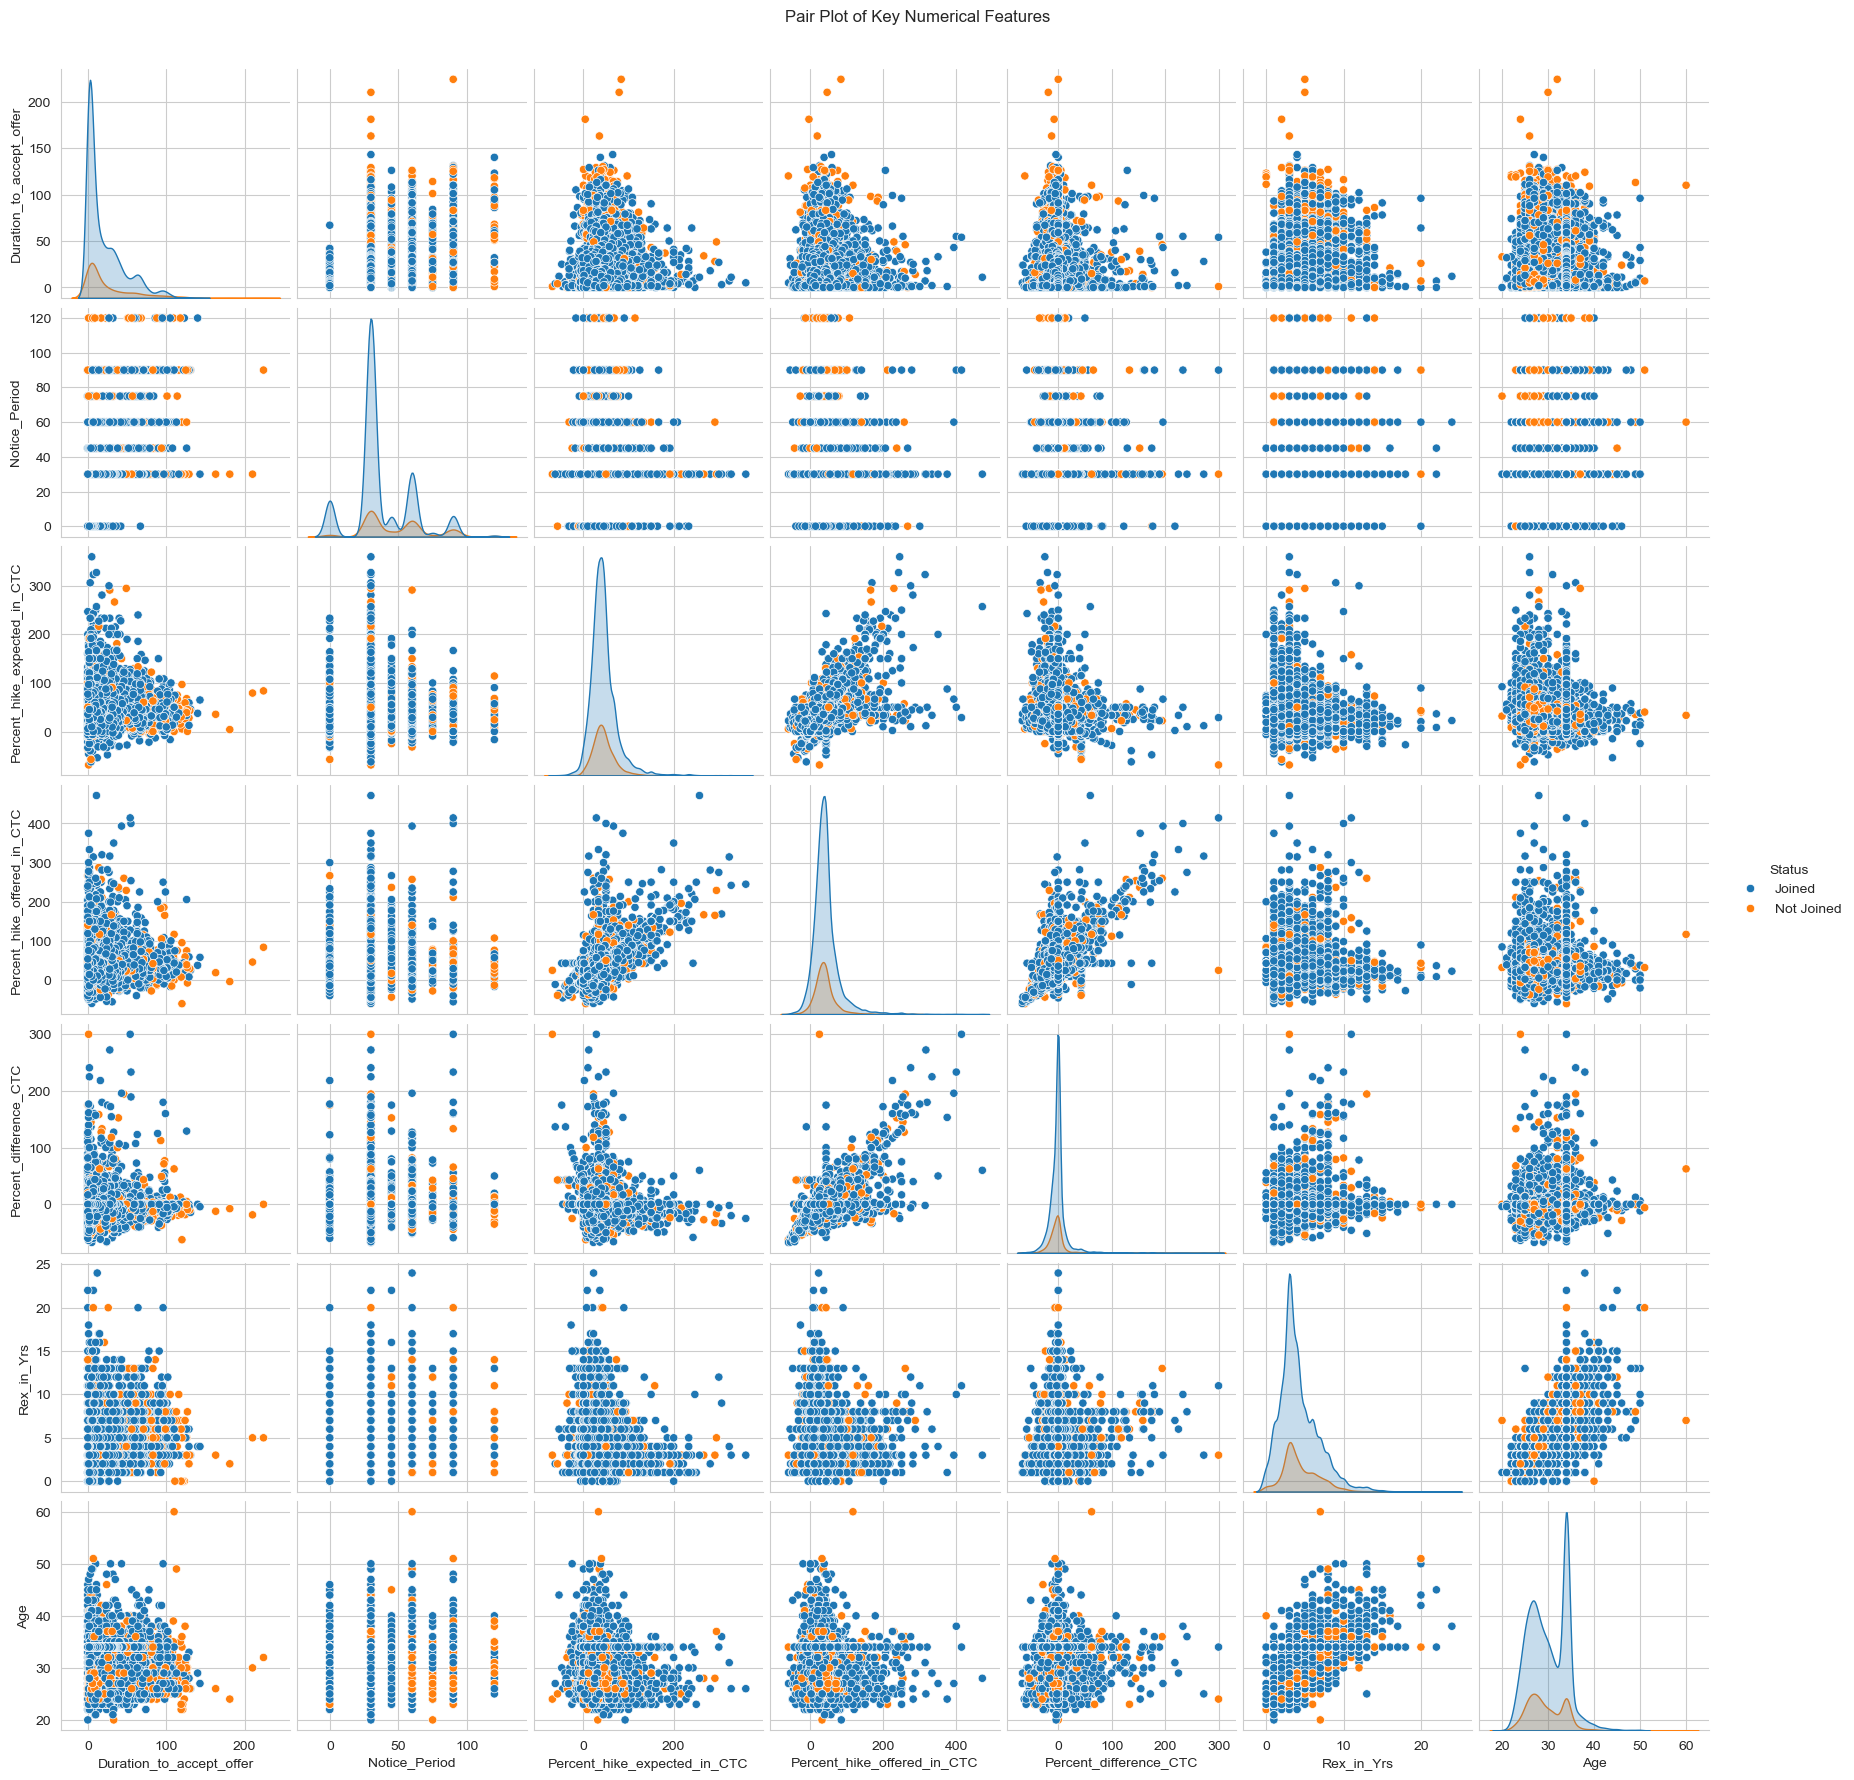

In [316]:
# Filtering the dataframe to only include numerical features and the 'Status' column
numerical_data_with_status = hr_data_clean[numerical_features + ['Status']]

sns.pairplot(numerical_data_with_status, hue='Status')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

### 5. Chi-Square Test for Categorical Variables


In [319]:
for feature in categorical_features:
    contingency_table = pd.crosstab(hr_data_clean[feature], hr_data_clean['Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'\nChi-square test for {feature} and Status:')
    print(f'Chi-square: {chi2:.2f}, p-value: {p:.4f}')


Chi-square test for Offered_Band and Status:
Chi-square: 8.81, p-value: 0.0319

Chi-square test for Candidate_relocate_actual and Status:
Chi-square: 344.20, p-value: 0.0000

Chi-square test for Gender and Status:
Chi-square: 1.41, p-value: 0.2354

Chi-square test for Candidate_Source and Status:
Chi-square: 97.11, p-value: 0.0000

Chi-square test for LOB and Status:
Chi-square: 144.13, p-value: 0.0000

Chi-square test for Location and Status:
Chi-square: 90.34, p-value: 0.0000

Chi-square test for Region_Name and Status:
Chi-square: 81.63, p-value: 0.0000

Chi-square test for Domicile_Name and Status:
Chi-square: 22.98, p-value: 0.4620


### 6. Heatmap of Categorical Relationships

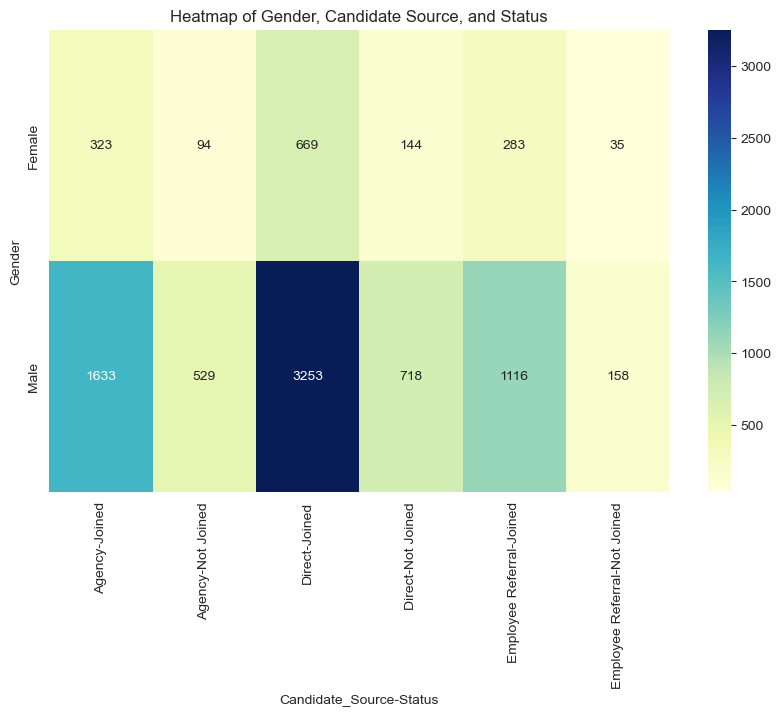

In [323]:
cross_tab = pd.crosstab(hr_data_clean['Gender'], [hr_data_clean['Candidate_Source'], hr_data_clean['Status']])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Gender, Candidate Source, and Status')
plt.show()

## Bi-Variate and Multi-Variate Analysis Observations

### 1. Correlation Analysis for Numerical Features
- The heatmap of the correlation matrix showed that there are some moderate to strong correlations among the numerical features.
- **Key Observations:**
  - `Duration_to_accept_offer` and `Notice_Period` have a moderate positive correlation (0.40), suggesting that candidates with longer notice periods tend to take longer to accept offers.
  - `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC` are highly correlated (0.75), indicating that the offered percentage hike is closely related to the expected percentage hike.
  - No strong correlations were observed between `Joining_Bonus` and other numerical features.

### 2. Comparison of Numerical Features by Status
- **Distribution of Numerical Features:**
  - **Duration_to_accept_offer:** Candidates who joined the company tend to have a slightly lower duration to accept offers compared to those who did not join.
  - **Notice_Period:** Candidates who joined have a similar notice period as those who did not join.
  - **Percent_hike_expected_in_CTC:** Candidates who joined generally expected a higher hike in CTC.
  - **Percent_hike_offered_in_CTC:** The hike offered is higher for candidates who joined.
  - **Percent_difference_CTC:** There is a noticeable difference in CTC expectations vs. offers between candidates who joined and those who did not.
  - **Joining_Bonus:** Candidates who joined tend to receive higher joining bonuses.
  - **Rex_in_Yrs:** Experience level does not vary significantly between candidates who joined and those who did not.
  - **Age:** Age distribution is relatively similar between candidates who joined and those who did not.

### 3. Categorical Feature Relationships
- **Count Plots:**
  - **Offered_Band:** Most common offered band is E1 for candidates who joined. 
  - **Candidate_relocate_actual:** Candidates who did not join are less likely to relocate compared to those who joined.
  - **Gender:** No significant difference in gender distribution between candidates who joined and those who did not.
  - **Candidate_Source:** Direct candidates are more likely to join compared to candidates from other sources.
  - **LOB:** The INFRA line of business has a higher number of candidates who joined.
  - **Location:** Chennai has the highest number of candidates who joined.
  - **Region_Name:** The South region has a higher number of candidates who joined.
  - **Domicile_Name:** Candidates from Haryana have a higher number of joiners.

### 4. Pair Plot for Key Features
- **Observations:**
  - Pair plots showed interactions between numerical features, such as the relationship between `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC`.
  - The scatter plots reveal clusters of candidates based on their `Status`, indicating potential patterns in how numerical features relate to joining status.

### 5. Chi-Square Test for Categorical Variables
- **Chi-Square Test Results:**
  - **Offered_Band and Status:** p-value = 0.0319, indicating a significant relationship between the offered band and whether candidates joined.
  - **Candidate_relocate_actual and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Gender and Status:** p-value = 0.2354, suggesting no significant relationship.
  - **Candidate_Source and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **LOB and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Location and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Region_Name and Status:** p-value < 0.0001, indicating a very significant relationship.
  - **Domicile_Name and Status:** p-value = 0.4620, suggesting no significant relationship.

### 6. Heatmap of Categorical Relationships
- **Heatmap Observations:**
  - The heatmap of gender, candidate source, and status revealed that candidates from certain sources and genders are more likely to join the company.
  - There are noticeable patterns where specific combinations of `Candidate_Source` and `Gender` are associated with higher joining rates.


## Dropping unnecessary columns

In [328]:
# Dropping unnecessary columns
columns_to_drop = ['Sno', 'Candidate_Ref', 'Date_of_Interview', 'Postal_Code']
hr_data_clean = hr_data_clean.drop(columns=columns_to_drop)

# Display the remaining columns
hr_data_clean.head()


,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,...,Location_ID,Age,LOB_Id,Domicile_Id,Status,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,...,L001,34.0,1,D6,Joined,ERS,Noida,R1,North,Goa
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,...,L002,34.0,2,D9,Joined,INFRA,Chennai,R2,South,Himachal Pradesh
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,...,L001,27.0,2,D10,Joined,INFRA,Noida,R1,North,Jharkhand
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,...,L001,34.0,2,D3,Joined,INFRA,Noida,R1,North,Chandigarh
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,...,L001,34.0,2,D21,Joined,INFRA,Noida,R1,North,Tripura


In [330]:
# separate numerical features from the dataframe
numerical_features= hr_data_clean.select_dtypes(exclude=['object','category'])
numerical_features

,Duration_to_accept_offer,Notice_Period,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Rex_in_Yrs,Age,LOB_Id
0,14,30,-20.79,13.16,42.86,7,34.0,1
1,18,30,50.00,320.00,180.00,8,34.0,2
2,3,45,42.84,42.84,0.00,4,27.0,2
3,26,30,42.84,42.84,0.00,4,34.0,2
4,1,120,42.59,42.59,0.00,6,34.0,2
...,...,...,...,...,...,...,...,...
8990,4,0,191.67,191.67,0.00,1,34.0,1
8991,2,0,150.00,150.00,0.00,3,34.0,4
8992,0,0,35.42,35.42,0.00,5,34.0,2
8993,0,30,76.92,53.85,-13.04,4,34.0,2


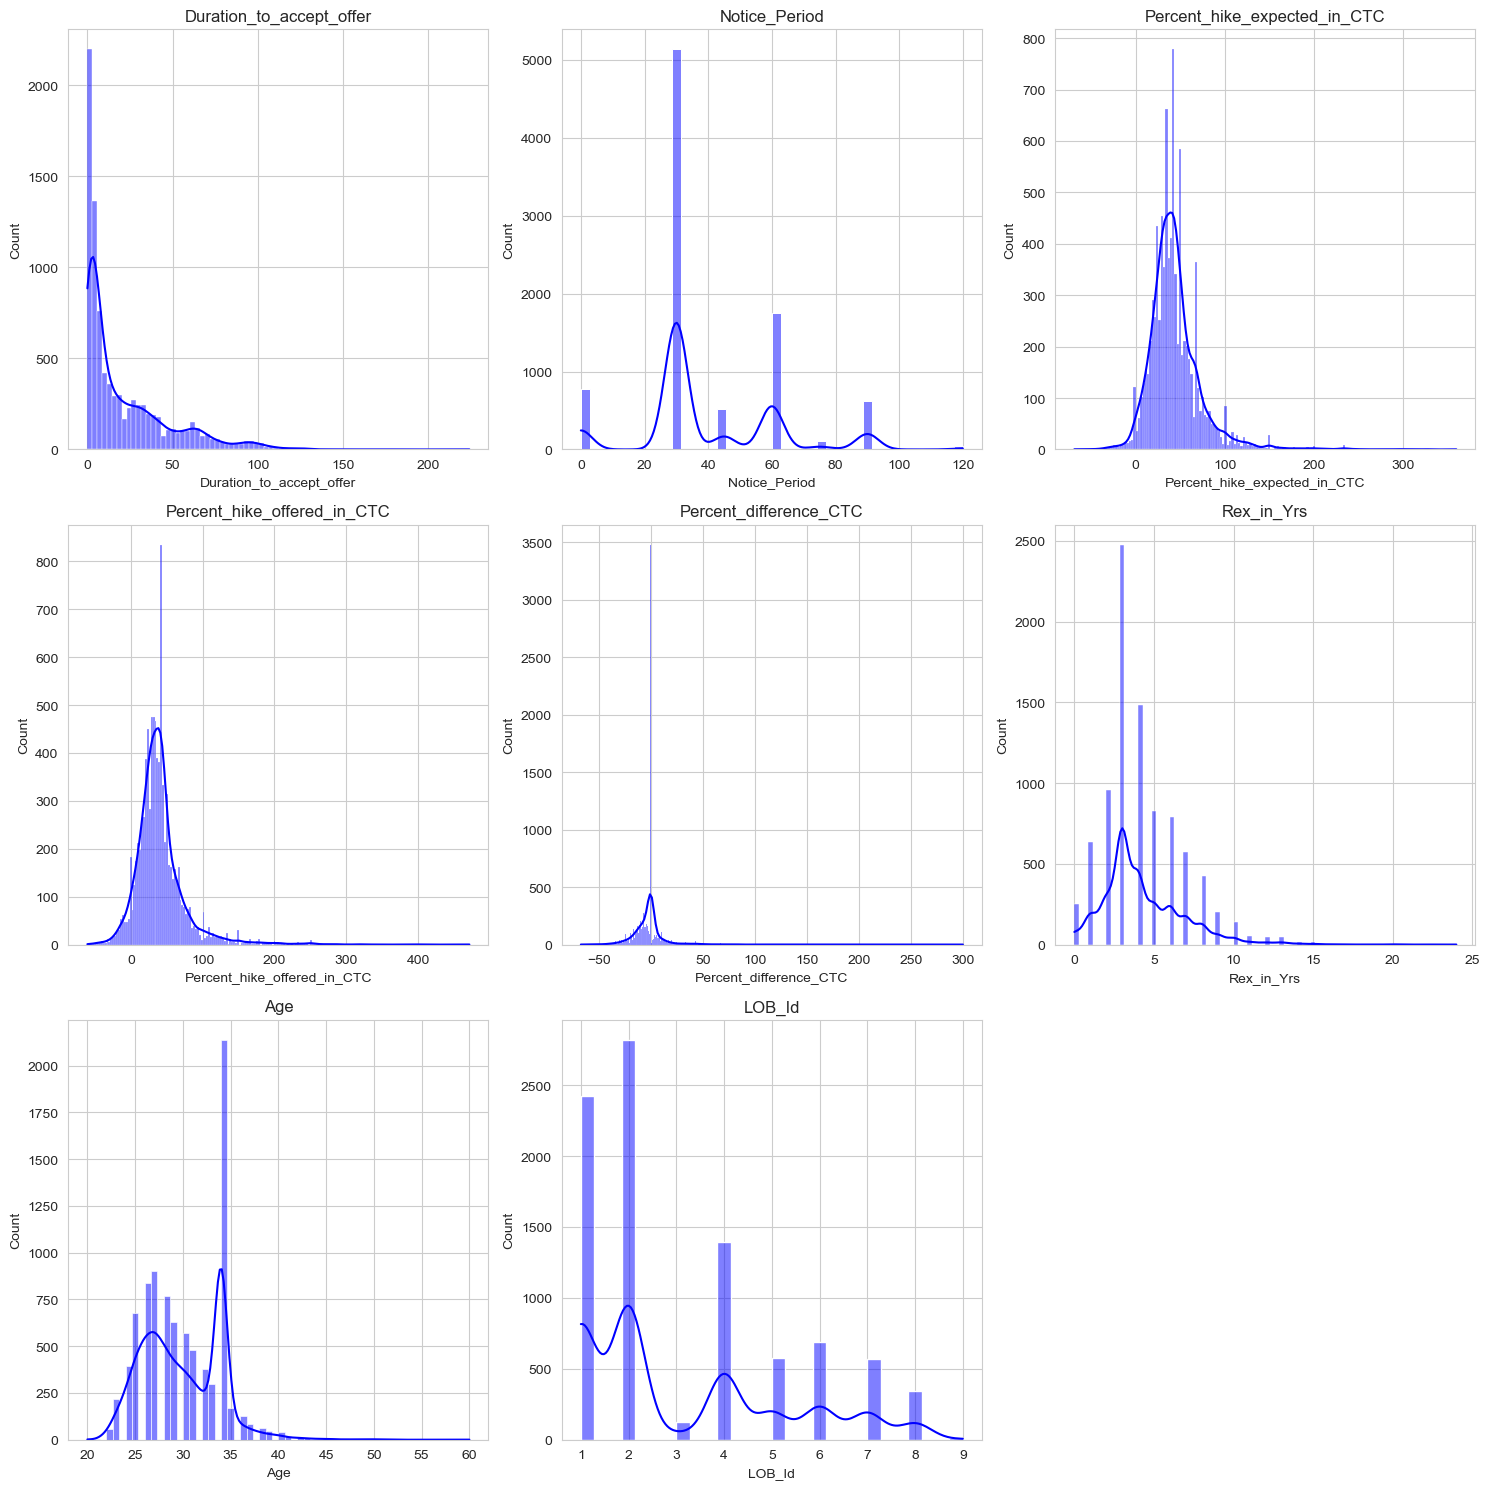

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_features = len(numerical_features.columns)
cols = 3
rows = int(np.ceil(num_features / cols))

plt.figure(figsize=(15, rows * 5))
for i, feature in enumerate(numerical_features.columns, start=1):
    plt.subplot(rows, cols, i)
    sns.histplot(hr_data_clean[feature], color='blue', kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()


# **Outlier analysis and treatment**

In [335]:

# List of numerical features
numerical_features = ['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC', 
                      'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',  
                      'Rex_in_Yrs', 'Age']

# Compute Z-scores
z_scores = hr_data_clean[numerical_features].apply(zscore)

# Identify outliers (typically, Z-score > 3 or < -3)
outliers = (np.abs(z_scores) > 3)

# Display the number of outliers for each feature
print(outliers.sum())


Duration_to_accept_offer        145
Notice_Period                    41
Percent_hike_expected_in_CTC    143
Percent_hike_offered_in_CTC     173
Percent_difference_CTC          147
Rex_in_Yrs                      141
Age                              43
dtype: int64


### **Outlier Analysis Results**

The Z-score method identified the following counts of outliers in the dataset:

- **Duration_to_accept_offer**: 145 outliers
- **Notice_Period**: 41 outliers
- **Percent_hike_expected_in_CTC**: 143 outliers
- **Percent_hike_offered_in_CTC**: 173 outliers
- **Percent_difference_CTC**: 147 outliers
- **Rex_in_Yrs**: 141 outliers
- **Age**: 43 outliers

#### **Next Steps for Outlier Treatment:**

1. **Capping or Clipping**: Cap values at the 5th and 95th percentiles.
2. **Transformation**: Apply transformations like log or Box-Cox.
3. **Removal**: Remove rows with outliers where justified.
4. **Model-Based Handling**: Consider robust models that handle outliers effectively.

*Observation:* It's essential to carefully choose an outlier treatment method based on its impact on data integrity and the analysis objectives. 

#### **Selected Outlier Treatment Approach**

For this project, we will start by using the **capping/clipping method** to reduce the influence of outliers while retaining the overall structure of the data. This method ensures that extreme values are brought within a reasonable range without entirely removing them.

### **Post-Treatment Evaluation**

*Observation:* After treating the outliers, we will re-evaluate their presence using Z-scores to confirm that the treatment method has effectively reduced the impact of extreme values.


## **Outlier Treatment**

1. **Capping and Flooring:**
   - Limit outliers by capping at the 5th and 95th percentiles.
   - Reduces extreme variations without losing much data.

2. **Log Transformation:**
   - Applied to `Rex_in_Yrs` to reduce skewness.
   - Helps normalize the distribution for better model performance.

3. **Imputation:**
   - Replaced outliers in `Age` with the median.
   - Preserves data continuity while minimizing extreme impact.

4. **Verification:**
   - Recalculate Z-scores to check remaining outliers.
   - Ensure the effectiveness of the treatment.


In [339]:

# Create a copy of the dataset to avoid modifying the original data
hr_data_treated = hr_data_clean.copy()

# Step 1: Capping and Flooring - Using 5th and 95th percentiles
for feature in numerical_features:
    lower_limit = hr_data_treated[feature].quantile(0.05)
    upper_limit = hr_data_treated[feature].quantile(0.95)
    hr_data_treated[feature] = np.where(hr_data_treated[feature] < lower_limit, lower_limit, hr_data_treated[feature])
    hr_data_treated[feature] = np.where(hr_data_treated[feature] > upper_limit, upper_limit, hr_data_treated[feature])

# Step 2: Applying Log Transformation for skewed features (if needed)
# Apply log transformation to features that are strictly positive and have high skewness
hr_data_treated['Rex_in_Yrs'] = np.log1p(hr_data_treated['Rex_in_Yrs'])  # Example transformation

# Step 3: Imputation (if there are minimal outliers that could be replaced by median or mean)
# Impute minimal outliers for relevant features
hr_data_treated['Age'] = hr_data_treated['Age'].fillna(hr_data_treated['Age'].median())  # Example of median imputation

# Optional: Verify the outlier treatment by recalculating Z-scores and reviewing the summary
from scipy.stats import zscore

# Compute Z-scores again to see the effect of outlier treatment
z_scores_after = hr_data_treated[numerical_features].apply(zscore)
outliers_after = (np.abs(z_scores_after) > 3).sum()

print("Number of outliers after treatment for each feature:")
print(outliers_after)


Number of outliers after treatment for each feature:
Duration_to_accept_offer        0
Notice_Period                   0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Rex_in_Yrs                      0
Age                             0
dtype: int64


## **Checking of Correlation between variables**

## Multicollinearity and VIF Analysis

### Overview
Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in regression models. A high VIF indicates that a feature is highly correlated with other features, which can lead to instability in the regression coefficients.



In [344]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = hr_data_clean[['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC',
                   'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Rex_in_Yrs', 
                   'Age', 'LOB_Id']]
Y = hr_data_clean['Status']

# Display the first few rows of the data
hr_data_clean.head()


,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,...,Location_ID,Age,LOB_Id,Domicile_Id,Status,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,...,L001,34.0,1,D6,Joined,ERS,Noida,R1,North,Goa
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,...,L002,34.0,2,D9,Joined,INFRA,Chennai,R2,South,Himachal Pradesh
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,...,L001,27.0,2,D10,Joined,INFRA,Noida,R1,North,Jharkhand
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,...,L001,34.0,2,D3,Joined,INFRA,Noida,R1,North,Chandigarh
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,...,L001,34.0,2,D21,Joined,INFRA,Noida,R1,North,Tripura


In [347]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables (features)
X = hr_data_clean[['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC',
                   'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Rex_in_Yrs', 
                   'Age', 'LOB_Id']]

# Add a constant to the model (intercept)
X_with_constant = sm.add_constant(X)

# Calculate VIF for each feature (excluding the constant)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i+1) for i in range(len(X.columns))]

# Display the VIF values
print(vif)


                        Feature        VIF
0      Duration_to_accept_offer   1.164764
1                 Notice_Period   1.200292
2  Percent_hike_expected_in_CTC  16.466655
3   Percent_hike_offered_in_CTC  24.827837
4        Percent_difference_CTC  14.078318
5                    Rex_in_Yrs   1.618626
6                           Age   1.515413
7                        LOB_Id   1.051983


### Interpretation
- **High VIF Values**: Features with VIF values above 10 are considered to have high multicollinearity. In this dataset:
  - `Percent_hike_expected_in_CTC` (VIF: 16.47)
  - `Percent_hike_offered_in_CTC` (VIF: 24.83)
  - `Percent_difference_CTC` (VIF: 14.08)
  
  These features are highly correlated with other features and might affect the stability of the regression model.

### Steps to Address Multicollinearity
1. **Review Correlation Matrix**: Analyze the correlation between features to understand their relationships and contributions to multicollinearity.
   
2. **Feature Selection**:
   - **Remove Highly Correlated Features**: Consider removing or combining features with high VIF values.
   - **Combine Features**: Use techniques like Principal Component Analysis (PCA) to combine features with high correlation.

3. **Recalculate VIF**: After making adjustments, recalculate VIF to ensure multicollinearity has been addressed.

### Example Actions
- Remove features with the highest VIF values.
- Recalculate VIF after adjustments to validate improvements.

By following these steps, you can build a more reliable model with improved interpretability and stability.


In [350]:
correlation_matrix = X.corr()
display(HTML(correlation_matrix.to_html()))


,Duration_to_accept_offer,Notice_Period,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Rex_in_Yrs,Age,LOB_Id
Duration_to_accept_offer,1.000000,0.363160,0.018484,0.006826,-0.009560,0.114737,0.020873,0.111678
Notice_Period,0.363160,1.000000,-0.006452,-0.014850,-0.015440,0.182374,-0.005314,0.085533
Percent_hike_expected_in_CTC,0.018484,-0.006452,1.000000,0.669564,-0.161371,-0.216784,-0.136904,-0.087565
Percent_hike_offered_in_CTC,0.006826,-0.014850,0.669564,1.000000,0.597677,-0.110791,-0.079595,-0.086584
Percent_difference_CTC,-0.009560,-0.015440,-0.161371,0.597677,1.000000,0.080438,0.037872,-0.032779
Rex_in_Yrs,0.114737,0.182374,-0.216784,-0.110791,0.080438,1.000000,0.568138,0.161354
Age,0.020873,-0.005314,-0.136904,-0.079595,0.037872,0.568138,1.000000,0.153589
LOB_Id,0.111678,0.085533,-0.087565,-0.086584,-0.032779,0.161354,0.153589,1.000000


## Feature Correlation Matrix

The following correlation matrix provides insights into the relationships between features in the dataset. Values close to 1 or -1 indicate a strong relationship, while values close to 0 indicate weak or no relationship.

### Correlation Matrix

| Feature                        | Duration_to_accept_offer | Notice_Period | Percent_hike_expected_in_CTC | Percent_hike_offered_in_CTC | Percent_difference_CTC | Rex_in_Yrs | Age  | LOB_Id |
|--------------------------------|---------------------------|---------------|------------------------------|-----------------------------|-------------------------|------------|------|--------|
| **Duration_to_accept_offer**   | 1.000000                  | 0.363160      | 0.018484                     | 0.006826                    | -0.009560               | 0.114737   | 0.020873 | 0.111678 |
| **Notice_Period**              | 0.363160                  | 1.000000      | -0.006452                    | -0.014850                   | -0.015440               | 0.182374   | -0.005314 | 0.085533 |
| **Percent_hike_expected_in_CTC** | 0.018484                  | -0.006452     | 1.000000                     | 0.669564                    | -0.161371               | -0.216784  | -0.136904 | -0.087565 |
| **Percent_hike_offered_in_CTC** | 0.006826                  | -0.014850     | 0.669564                     | 1.000000                    | 0.597677                | -0.110791  | -0.079595 | -0.086584 |
| **Percent_difference_CTC**      | -0.009560                 | -0.015440     | -0.161371                    | 0.597677                    | 1.000000                | 0.080438   | 0.037872  | -0.032779 |
| **Rex_in_Yrs**                 | 0.114737                  | 0.182374      | -0.216784                    | -0.110791                   | 0.080438                | 1.000000   | 0.568138  | 0.161354 |
| **Age**                        | 0.020873                  | -0.005314     | -0.136904                    | -0.079595                   | 0.037872                | 0.568138   | 1.000000  | 0.153589 |
| **LOB_Id**                     | 0.111678                  | 0.085533      | -0.087565                    | -0.086584                   | -0.032779               | 0.161354   | 0.153589  | 1.000000 |

### Interpretation

- **Strong Correlations**:
  - `Percent_hike_expected_in_CTC` and `Percent_hike_offered_in_CTC` (0.67)
  - `Percent_hike_offered_in_CTC` and `Percent_difference_CTC` (0.60)
  - `Rex_in_Yrs` and `Age` (0.57)

- **Weak or No Correlations**:
  - `Duration_to_accept_offer` and `Percent_hike_expected_in_CTC` (0.02)
  - `Notice_Period` and `Percent_hike_offered_in_CTC` (-0.015)
  - `Age` and `LOB_Id` (0.15)

### Action Points

- **High Correlation**: Features with high correlation may need further examination for multicollinearity or redundant information.
- **Feature Selection**: Consider removing or combining features with strong correlations to improve model stability and interpretability.


In [364]:
# Set the threshold for high correlation
corr_threshold = 0.6

# Identify features with high correlation
high_corr_var = np.where(np.abs(correlation_matrix) > corr_threshold)
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                    for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC')]


In [366]:
# Remove one feature from each pair
features_to_remove = set()
for pair in high_corr_pairs:
    features_to_remove.add(pair[1])  # Remove the second feature in the pair

print("Features to remove:", features_to_remove)


Features to remove: {'Percent_hike_offered_in_CTC'}


In [368]:
# Drop highly correlated features
hr_data_clean_reduced = hr_data_clean.drop(columns=features_to_remove)

print("Data after removing highly correlated features:")
display(HTML(hr_data_clean_reduced.head().to_html()))

Data after removing highly correlated features:


,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Age,LOB_Id,Domicile_Id,Status,LOB,Location,Region_ID,Region_Name,Domicile_Name
0,Yes,14,30,E2,-20.79,42.86,No,No,Female,Agency,7,L001,34.0,1,D6,Joined,ERS,Noida,R1,North,Goa
1,No,18,30,E2,50.00,180.00,No,No,Male,Employee Referral,8,L002,34.0,2,D9,Joined,INFRA,Chennai,R2,South,Himachal Pradesh
2,No,3,45,E2,42.84,0.00,No,No,Male,Agency,4,L001,27.0,2,D10,Joined,INFRA,Noida,R1,North,Jharkhand
3,No,26,30,E2,42.84,0.00,No,No,Male,Employee Referral,4,L001,34.0,2,D3,Joined,INFRA,Noida,R1,North,Chandigarh
4,Yes,1,120,E2,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,34.0,2,D21,Joined,INFRA,Noida,R1,North,Tripura


<Axes: >

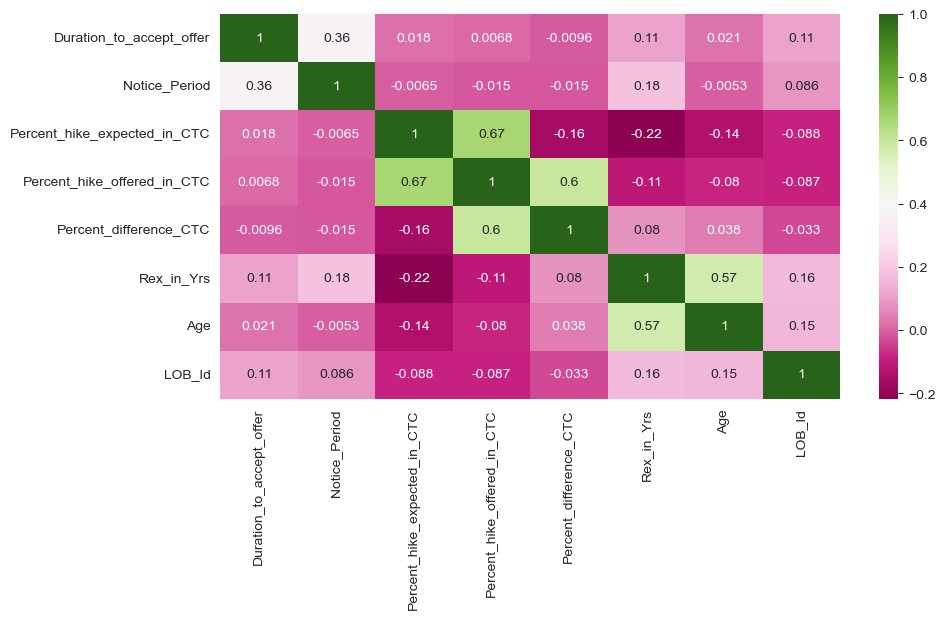

In [370]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,cmap='PiYG',annot=True)

## **Data Scaling**


### Overview

In this step, we perform data scaling to standardize the numerical features of our dataset. Scaling is essential to ensure that all features contribute equally to the analysis and modeling process.

### Numerical Features Selected for Scaling

We are scaling the following numerical features:
- Duration_to_accept_offer
- Notice_Period
- Percent_hike_expected_in_CTC
- Percent_hike_offered_in_CTC
- Percent_difference_CTC
- Rex_in_Yrs
- Age

### Chosen Scaling Method

Since we have already adjusted outliers using Z-score normalization, we will continue with Z-score normalization for consistency. This method standardizes the features to have a mean of 0 and a standard deviation of 1.

### Implementation

- **Scaling Applied**: Z-score normalization
- **Purpose**: To standardize numerical features for uniformity and to prepare the dataset for further analysis or modeling.

### Summary

- **Z-score Normalization**: Applied to ensure numerical features are standardized with a mean of 0 and a standard deviation of 1.
- **Outcome**: Numerical features are now scaled and ready for subsequent analysis or machine learning models.

Feel free to add or modify any additional observations as needed.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(hr_data_clean[numerical_features])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features, index=hr_data_clean.index)

# Update the numerical features in the original DataFrame using .loc
hr_data_clean.loc[:, numerical_features] = scaled_df

# Confirm the changes
# print(hr_data_clean.head())
display(HTML(hr_data_clean.head().to_html()))


## Data Transformation

### 1. Feature Encoding

Feature encoding is essential for converting categorical data into a numerical format that machine learning models can process.

#### Categorical Encoding

Categorical features need to be converted into numerical format through different encoding methods:

1. **One-Hot Encoding**
   - **Purpose**: Converts categorical variables into binary vectors, where each category is represented by a binary column (0 or 1).
   - **Use Case**: Suitable for nominal categorical features where there is no inherent order among categories.
   - **Example**: A feature like `Location` with categories such as `New York`, `Los Angeles`, and `Chicago` will be transformed into separate binary columns for each category.

2. **Label Encoding**
   - **Purpose**: Converts categorical labels into integer values, assigning a unique integer to each category.
   - **Use Case**: Suitable for ordinal features where categories have a meaningful order.
   - **Example**: A feature like `Status` with categories such as `Accepted`, `Rejected`, and `Pending` will be converted into integers representing their order.

**Notes:**
- **One-Hot Encoding**: Avoids creating a hierarchy among categories that do not have a natural order.
- **Label Encoding**: Useful for ordinal features where the order of catemachine learning models.
achine learning models.
achine learning models.


These encoding techniques help in preparing categorical features for analysis and machine learning models.

In [ ]:
#Assign all categorical features to a variable
categorical_features=list(hr_data_clean.select_dtypes(['category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical features
encoded_features = one_hot_encoder.fit_transform(hr_data_clean[categorical_features])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features), index=hr_data_clean.index)

# Concatenate encoded features with original data and drop original categorical columns
hr_data_clean = pd.concat([hr_data_clean, encoded_df], axis=1).drop(categorical_features, axis=1)


In [ ]:
display(HTML(hr_data_clean.head().to_html()))

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features